# IMPORT

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

from tqdm import tqdm

In [2]:
os.chdir(r'F:\\UNIVERSITY\\UNIVERSITY_DOCUMENTS\\CS231\\doan_v2')

# FUNCTION

In [3]:
def load_json(path):
    with open(path, 'r', encoding='utf-8') as file:
        film_dic = json.load(file)
        return film_dic


In [4]:
def save_json(dic, path):
    with open(path, 'w', encoding='utf-8') as file:
        film_dic = json.dump(dic, file, ensure_ascii=False, indent=6)
        return film_dic

In [5]:
def make_id(i, length=6):
    im_id = str(i)
    a = np.array(list(im_id))
    b = np.pad(a, pad_width=(length - len(a), 0), mode='constant', constant_values= '0')
    im_name = ''.join(b)

    return im_name

In [6]:
# Using plt to show
def scatter_plot(value_count, title=''):
    label = [label[0] for label in value_count.index]
    value = value_count.values

    # Show scatter
    plt.figure(figsize=(30, 30))
    plt.scatter(
        x=label,
        y=value,
    )
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [7]:
# Bar plot
def bar_plot(b_labels, b_values, title=''):
    plt.figure(figsize=(20, 10))
    plt.bar(
        x=b_labels,
        height=b_values,
        width=0.5,
    )
    plt.xticks(rotation=70)
    plt.xlabel(title)
    plt.legend()

# LOAD DATA

In [8]:
data_path = 'data/new_save_all.json' 
data = load_json(data_path)

# EDA

In [9]:
'''
    https://datascience.stackexchange.com/questions/122687/multilabel-classification-choosing-threshold
    https://viblo.asia/p/multi-label-classification-cho-bai-toan-tag-predictions-oOVlY2Lr58W
'''

'\n    https://datascience.stackexchange.com/questions/122687/multilabel-classification-choosing-threshold\n    https://viblo.asia/p/multi-label-classification-cho-bai-toan-tag-predictions-oOVlY2Lr58W\n'

## NUMBER OF GENRES PER FILMS

In [10]:
genres_per_film = [val['genre'] for val in data.values()]
unique_labels = np.unique(np.concatenate(genres_per_film))

In [11]:
unique_labels, len(unique_labels)

(array(['action', 'adult animation', 'adventure', 'alien invasion',
        'animation', 'anime', 'artificial intelligence', 'baction',
        'baseball', 'basketball', 'biography', 'boxing', 'buddy cop',
        'bumbling detective', 'business reality tv', 'caper', 'car action',
        'classic musical', 'classical western', 'comedy', 'comingofage',
        'computer animation', 'concert', 'contemporary western', 'crime',
        'cyberpunk', 'disaster', 'documentary', 'docuseries', 'drama',
        'drug crime', 'epic', 'fairy tale', 'family', 'fantasy', 'farce',
        'film noir', 'football', 'game show', 'gangster', 'giallo',
        'gun fu', 'handdrawn animation', 'hardboiled detective', 'heist',
        'history', 'holiday', 'holiday animation', 'holiday family',
        'horror', 'isekai', 'iyashikei', 'josei', 'jukebox musical',
        'kaiju', 'kung fu', 'martial arts', 'mecha', 'mockumentary',
        'music', 'musical', 'mystery', 'news', 'oneperson army action',
     

In [363]:
num_genres_per_film = [len(val['genre']) for val in data.values()]
sum_num_genres_per_film = pd.DataFrame(num_genres_per_film).value_counts()

In [364]:
selected_labels = ['documentary', 'drama', 'horror', 'mystery', 'romance', 'scifi', 'thriller']
for label in selected_labels:
    for uni_label in unique_labels:
        if label in uni_label:
            print(uni_label) 

documentary
drama
horror
mystery
romance
scifi
thriller


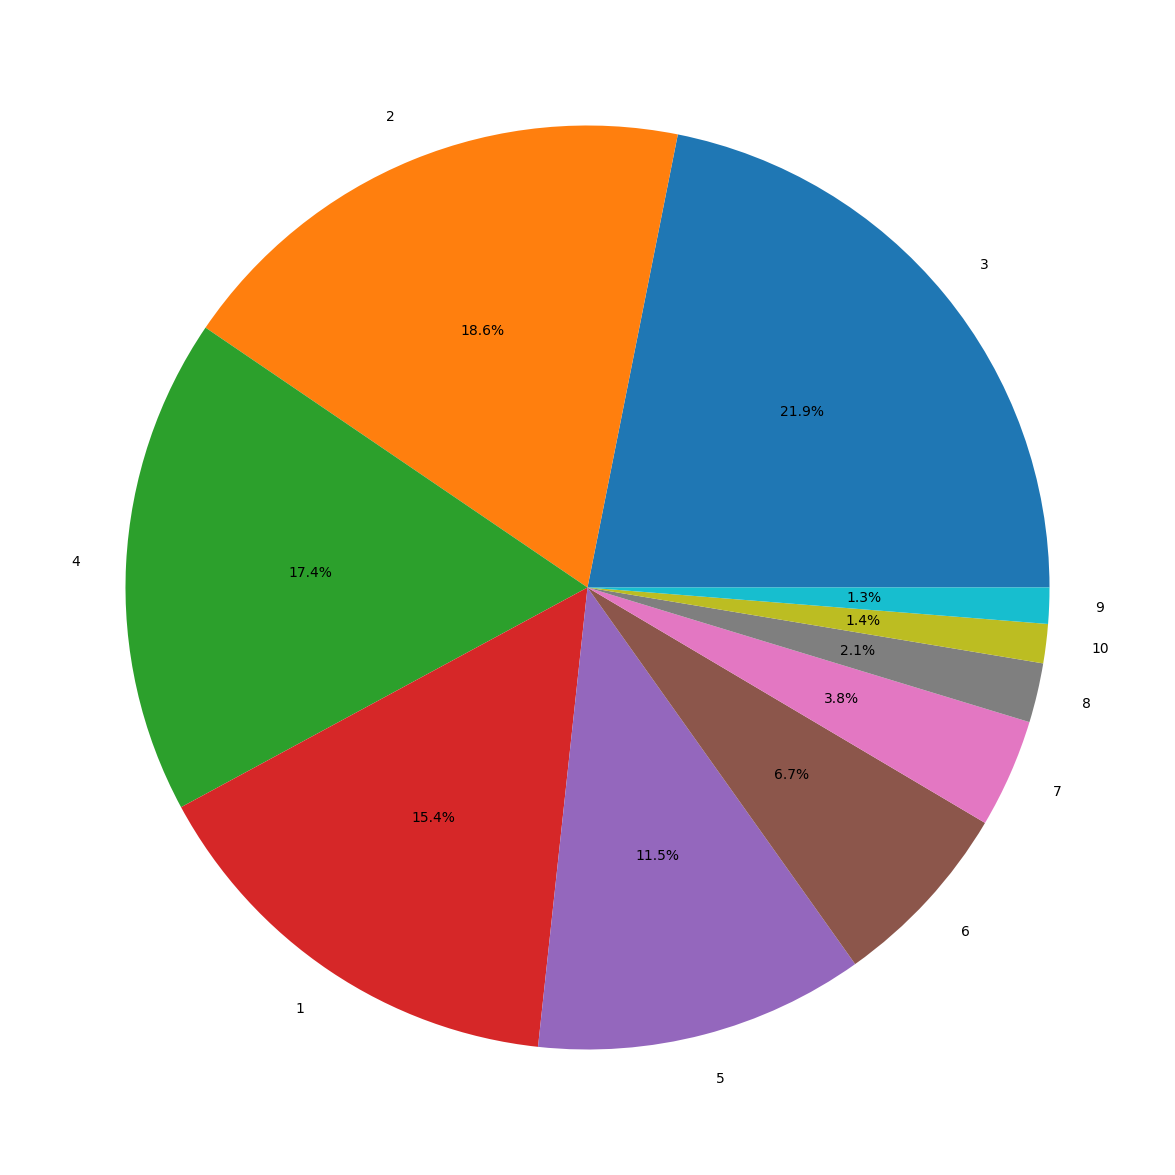

In [365]:
plt.figure(figsize=(20, 15))
plt.pie(
    x=sum_num_genres_per_film,
    labels=[c[0] for c in sum_num_genres_per_film.index],
    autopct='%1.1f%%',
)
plt.show()

## *LABEL COUNT*

In [366]:
# Get all labels
labels = []
for id, film_info in data.items():
    labels.extend(film_info['genre'])

In [367]:
# Number unique labels
len(np.unique(labels))

104

In [368]:
# Count labels frequencies
freq_value_counts = pd.DataFrame(labels).value_counts()
freq_value_counts[:20]

0          
drama          12175
horror          8481
thriller        8392
comedy          7487
romance         6001
documentary     5698
scifi           4974
mystery         4839
action          4092
crime           3645
adventure       3406
fantasy         2418
biography       1489
family          1281
history         1104
music            913
animation        838
war              703
sport            597
epic             508
Name: count, dtype: int64

<Axes: xlabel='0'>

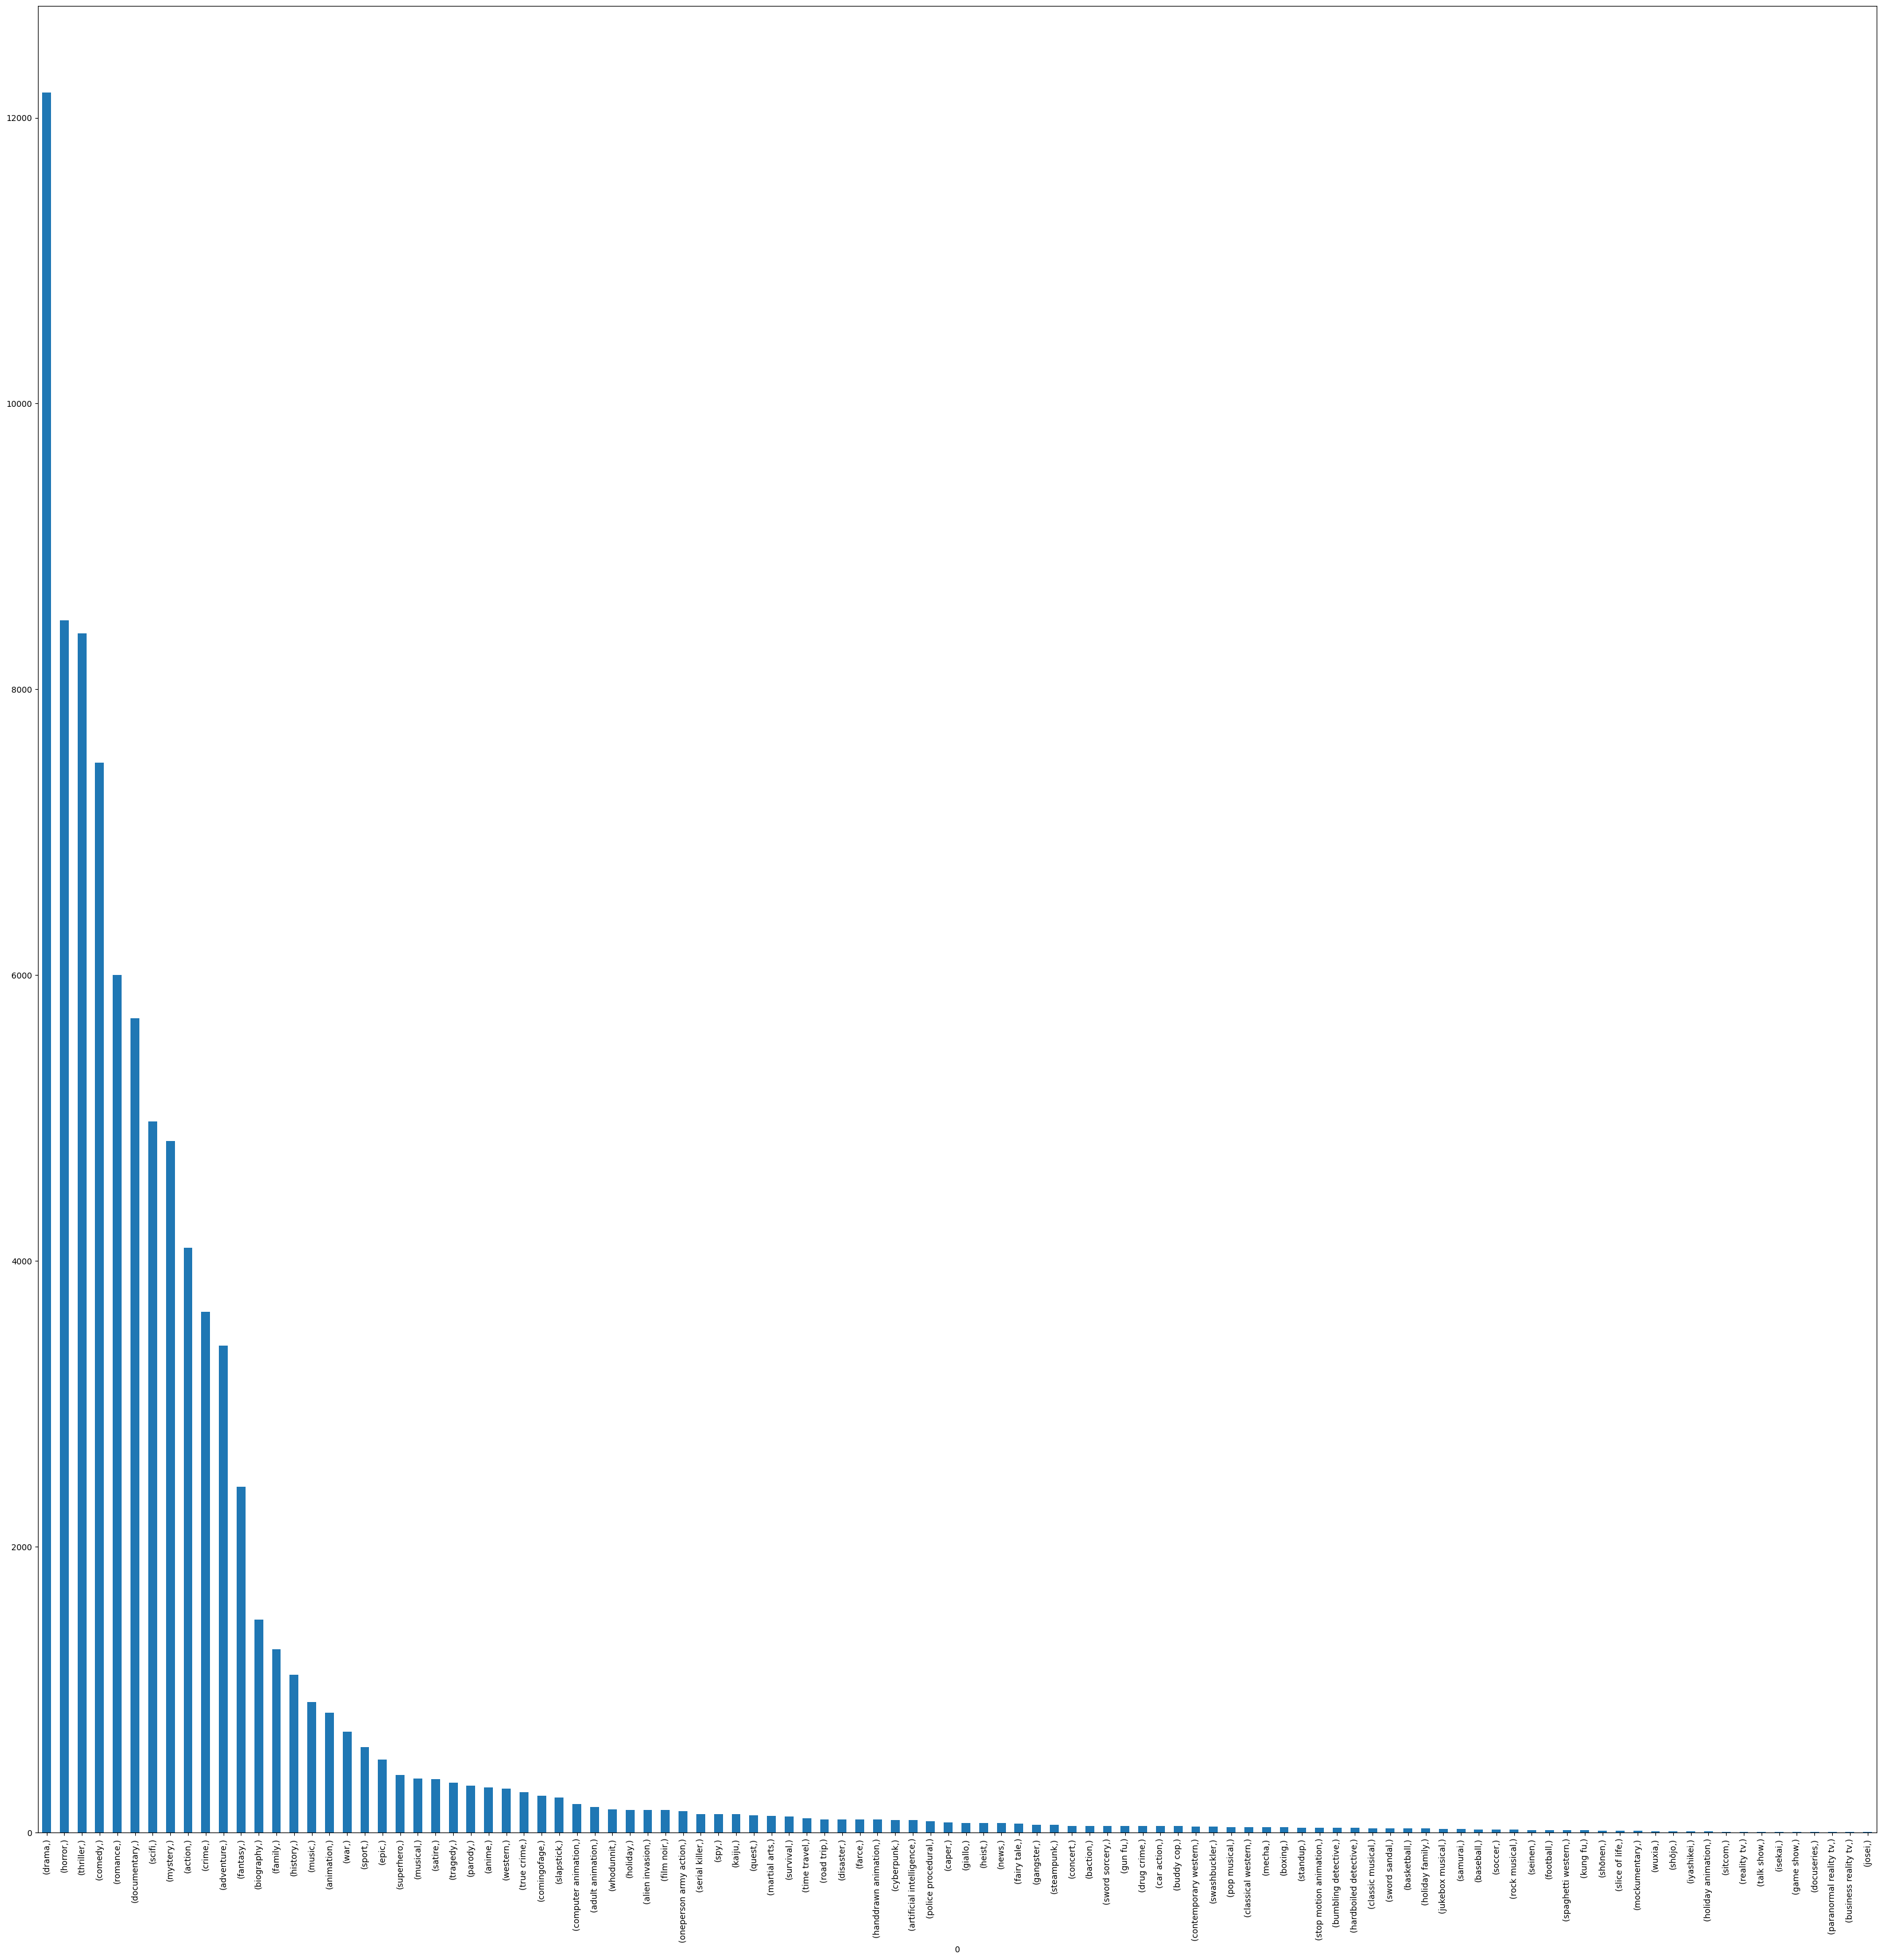

In [369]:
plt.figure(figsize=(40, 40))
freq_value_counts.plot(kind='bar')

# PREPROCESSING LABELS

In [370]:
selected_labels = ['documentary', 'drama', 'horror', 'mystery', 'romance', 'scifi', 'thriller']
label2id = {label: i for i, label in enumerate(selected_labels)}
label2id

{'documentary': 0,
 'drama': 1,
 'horror': 2,
 'mystery': 3,
 'romance': 4,
 'scifi': 5,
 'thriller': 6}

## Combine many genre to others

In [371]:
def create_label2newlabel(value_counts: pd.DataFrame, threshold: int):
    sort_df = value_counts[value_counts < threshold]
    all_labels = [label[0] for label in value_counts.index]
    labels_under = [label[0] for label in sort_df.index]

    dic = {label: 'others' if label in labels_under else label for label in all_labels}
    return dic

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


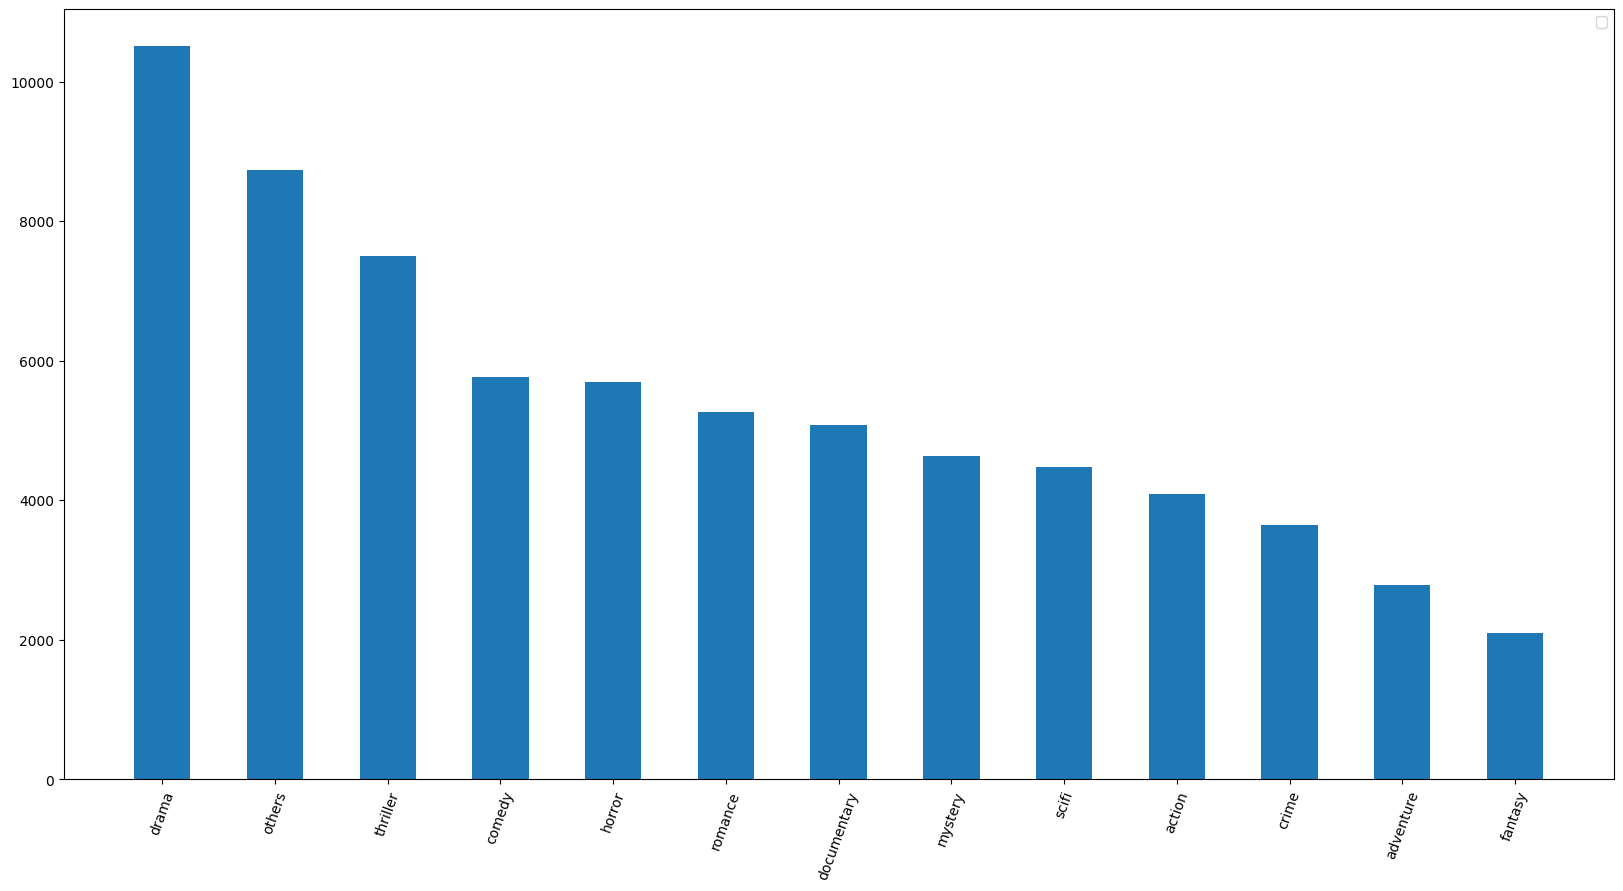

In [390]:

b_labels, b_values =[label[0] for label in vc_each_threshold[2].keys()], vc_each_threshold[2].values
bar_plot(b_labels, b_values)

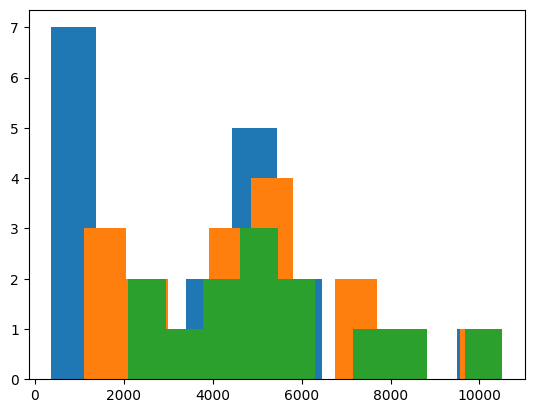

In [372]:
thresholds = [i for i in range(500, 2000, 500)]
vc_each_threshold = []
dic_convert_each_threshold = []
for threshold in thresholds:
    labels = [val['genre'] for val in data.values()]
    dic_convert = create_label2newlabel(freq_value_counts, threshold)
    # print(dic_convert)
    new_labels = [np.unique([dic_convert[label] for label in set_labels]) for set_labels in labels]
    new_labels = np.concatenate(new_labels)

    # Values Count
    new_vc = pd.DataFrame(new_labels).value_counts()
    vc_each_threshold.append(new_vc)
    dic_convert_each_threshold.append(dic_convert)



# # labels = [label[0] for label in freq_value_counts.keys()]
# vals = freq_value_counts.values